In [1]:
import pandas as pd 
import numpy as np 
from pandas.testing import assert_frame_equal
from pandas_datareader import data as web

# Import the plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Define dataframe variable
btc = pd.DataFrame()

# Define stock that will be analysed
asset = 'BTC-USD'
 
# Import data into dataframe
btc = web.DataReader(asset, data_source='yahoo', start='01-01-2015')

btc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550.0,314.248993
2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650.0,315.032013
2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400.0,281.082001
2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100.0,264.195007
2015-01-05,278.341003,265.084015,265.084015,274.473999,43962800.0,274.473999


In [3]:
btc['MA20'] = btc['Close'].rolling(window=20).mean()
btc['20dSTD'] = btc['Close'].rolling(window=20).std() 

btc['Upper'] = btc['MA20'] + (btc['20dSTD'] * 2)
btc['Lower'] = btc['MA20'] - (btc['20dSTD'] * 2)

In [4]:
btc.tail()

,High,Low,Open,Close,Volume,Adj Close,MA20,20dSTD,Upper,Lower
Date,,,,,,,,,,
2020-10-20,13184.566406,11900.928711,11913.077148,12823.689453,4.341471e+10,12823.689453,11258.764453,550.349355,12359.463162,10158.065744
2020-10-21,13161.593750,12717.093750,12801.635742,12965.891602,3.472976e+10,12965.891602,11377.800830,646.120254,12670.041338,10085.560322
2020-10-22,13015.961914,12752.647461,12971.548828,12931.539062,2.897498e+10,12931.539062,11496.103125,703.611225,12903.325575,10088.880675
2020-10-23,13145.066406,12885.747070,12931.574219,13108.062500,2.454232e+10,13108.062500,11617.284814,762.689286,13142.663386,10091.906243
2020-10-25,13329.183594,12910.067383,13017.526367,13026.433594,2.428410e+10,13026.433594,11728.406445,798.996520,13326.399485,10130.413406


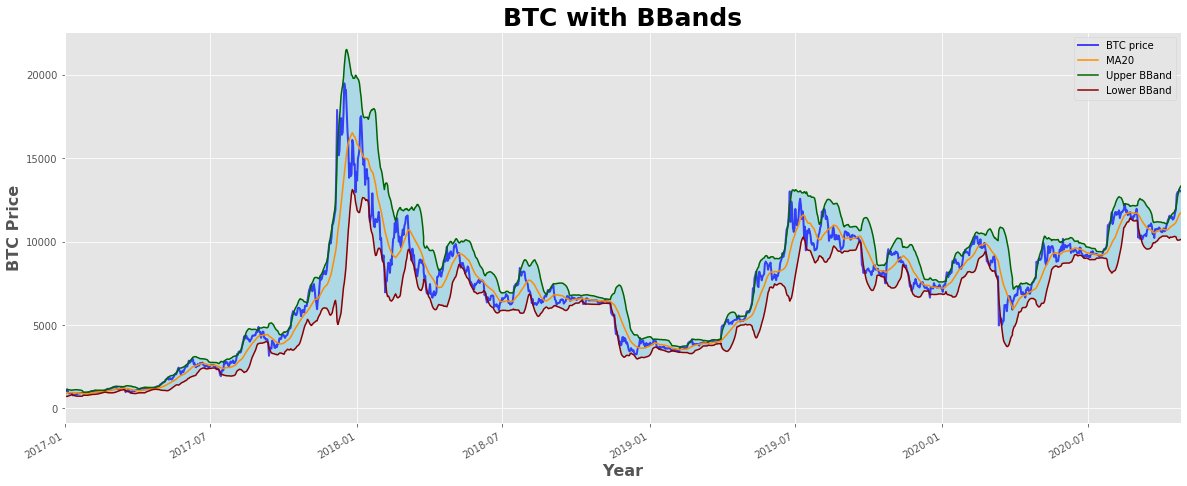

In [10]:
f, ax = plt.subplots(figsize = (20,8))

btc['Close'].loc['2017-01-01':].plot(color = 'blue', lw=2, alpha = .7, label = 'BTC price')
btc['MA20'].loc['2017-01-01':].plot(ax = ax, label = 'MA20', color = 'darkorange')
btc['Upper'].loc['2017-01-01':].plot(ax = ax, label = 'Upper BBand', color = 'darkgreen', alpha =1)
btc['Lower'].loc['2017-01-01':].plot(ax = ax, label = 'Lower BBand', color = 'darkred', alpha = 1)

ax.fill_between(btc.index, btc['Upper'], btc['Lower'], color='lightblue')
ax.set_ylabel('BTC Price', fontsize=16, fontweight = 'bold')
ax.set_xlabel('Year', fontsize=16, fontweight = 'bold')
ax.set_title('BTC with BBands', fontsize=25, fontweight='bold')
ax.legend()